In [1]:
!pip install --upgrade moviepy
!pip install torch torchvision torchaudio
!pip install tensorflow
!pip install pillow
!pip install scipy
!pip install matplotlib

In [2]:
import json
import os
from moviepy.editor import *
from moviepy import *

In [3]:
import tensorflow as tf
from PIL import *
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
from subprocess import call
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm
import math
from decimal import Decimal, localcontext

from pathlib import Path


In [4]:
def loadVideosToInfile(folder):
    videos = os.listdir(folder)
    with open('input', 'w') as inputfile:
        for v in videos:
            if v.split('.')[-1] == 'mp4':
                inputfile.write(v+'\n')

In [5]:
%cd C:\Users\zl\video-classification-3d-cnn-pytorch-master

C:\Users\zl\video-classification-3d-cnn-pytorch-master


In [6]:
loadVideosToInfile('../Input_films')

In [7]:
! python main.py --input input --video_root ../Input_films --output ../output.json --model resnet-34-kinetics-cpu.pth --model_depth 34 --mode score --resnet_shortcut A --no_cuda

loading model resnet-34-kinetics-cpu.pth
../Input_films\Abramovic-Marina_4Performances1975.mp4
../Input_films\Abramovic-Marina_Balkan-Erotic-Epic_2006.mp4
../Input_films\Abramovic-Marina_Dangerous-Games_2008.mp4
../Input_films\Abramovic.Marina.Seven.Easy.Pieces.2007.mp4


ffmpeg version 6.0-essentials_build-www.gyan.dev Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.2.0 (Rev10, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libvpl --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-lib

In [8]:
file = open('../output.json')
segments = json.load(file)

In [9]:
folder_path = r'C:\Users\zl\Input_films'
fps=[]
file_names = os.listdir(folder_path)
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    if file_name.endswith('.mp4'):
        video = VideoFileClip(file_path)
        fps.append(video.fps)

In [10]:
fps

[29.97002997002997, 25.0, 23.976023976023978, 23.976023976023978]

In [11]:
file_names.pop(0)

'.DS_Store'

In [12]:
file_names

['Abramovic-Marina_4Performances1975.mp4',
 'Abramovic-Marina_Balkan-Erotic-Epic_2006.mp4',
 'Abramovic-Marina_Dangerous-Games_2008.mp4',
 'Abramovic.Marina.Seven.Easy.Pieces.2007.mp4']

In [13]:
label_periods = []
for f in segments:
    print(f['video'])
    currentLabel = None
    ts = 0
    te = 0
    for c in f['clips']:
        label = c['label']
        s = c['segment'][0]
        e = c['segment'][1]
        if label == currentLabel:
            te = e 
        else:
            label_periods.append([(ts,te),currentLabel, f['video']])

            ts = s
            te = e 
            currentLabel = label

Abramovic-Marina_4Performances1975.mp4
Abramovic-Marina_Balkan-Erotic-Epic_2006.mp4
Abramovic-Marina_Dangerous-Games_2008.mp4
Abramovic.Marina.Seven.Easy.Pieces.2007.mp4


In [14]:
label_periods

[[(0, 0), None, 'Abramovic-Marina_4Performances1975.mp4'],
 [(1, 48), 'front raises', 'Abramovic-Marina_4Performances1975.mp4'],
 [(49, 64), 'juggling balls', 'Abramovic-Marina_4Performances1975.mp4'],
 [(65, 208),
  'snatch weight lifting',
  'Abramovic-Marina_4Performances1975.mp4'],
 [(209, 224), 'dancing ballet', 'Abramovic-Marina_4Performances1975.mp4'],
 [(225, 240), 'smoking', 'Abramovic-Marina_4Performances1975.mp4'],
 [(241, 256), 'texting', 'Abramovic-Marina_4Performances1975.mp4'],
 [(257, 272), 'tai chi', 'Abramovic-Marina_4Performances1975.mp4'],
 [(273, 288), 'playing poker', 'Abramovic-Marina_4Performances1975.mp4'],
 [(289, 304), 'texting', 'Abramovic-Marina_4Performances1975.mp4'],
 [(305, 320), 'playing poker', 'Abramovic-Marina_4Performances1975.mp4'],
 [(321, 336), 'kissing', 'Abramovic-Marina_4Performances1975.mp4'],
 [(337, 432), 'smoking', 'Abramovic-Marina_4Performances1975.mp4'],
 [(433, 448),
  'sign language interpreting',
  'Abramovic-Marina_4Performances197

In [15]:
longPeriods = []
for lp in label_periods:
    for i in range(0,len(file_names)):
        if file_names[i]==lp[2]:
            frame_length=1/fps[i]
            if lp[0][1]-lp[0][0] > 4/frame_length:
                longPeriods.append(lp)

In [16]:
longPeriods

[[(65, 208),
  'snatch weight lifting',
  'Abramovic-Marina_4Performances1975.mp4'],
 [(993, 1168), 'smoking', 'Abramovic-Marina_4Performances1975.mp4'],
 [(1409, 1552), 'smoking', 'Abramovic-Marina_4Performances1975.mp4'],
 [(2561, 2688), 'brushing hair', 'Abramovic-Marina_4Performances1975.mp4'],
 [(2993, 3200), 'brushing hair', 'Abramovic-Marina_4Performances1975.mp4'],
 [(5313, 5456), 'brushing hair', 'Abramovic-Marina_4Performances1975.mp4'],
 [(9537, 9680), 'smoking', 'Abramovic-Marina_4Performances1975.mp4'],
 [(9729, 9872), 'smoking', 'Abramovic-Marina_4Performances1975.mp4'],
 [(10833, 11072), 'brushing hair', 'Abramovic-Marina_4Performances1975.mp4'],
 [(12401, 12560), 'smoking', 'Abramovic-Marina_4Performances1975.mp4'],
 [(13281, 13472), 'fixing hair', 'Abramovic-Marina_4Performances1975.mp4'],
 [(18081, 18272), 'whistling', 'Abramovic-Marina_4Performances1975.mp4'],
 [(24817, 24960), 'brushing hair', 'Abramovic-Marina_4Performances1975.mp4'],
 [(25297, 25552), 'front raise

In [17]:
class1=[]
for i in range(0,len(longPeriods)):
    class1.append(longPeriods[i][1])
class2=[]
for i in class1:
    if i not in class2:
        class2.append(i)
class2

['snatch weight lifting',
 'smoking',
 'brushing hair',
 'fixing hair',
 'whistling',
 'front raises',
 'playing poker',
 'testifying',
 'tai chi',
 'sign language interpreting',
 'yoga',
 'dancing ballet',
 'tap dancing',
 'robot dancing',
 'riding or walking with horse',
 'drawing',
 'writing',
 'kissing',
 'golf putting',
 'singing',
 'stretching leg',
 'chopping wood',
 'walking the dog',
 'cheerleading',
 'news anchoring',
 'diving cliff',
 'passing American football (not in game)',
 'extinguishing fire',
 'cleaning windows',
 'checking tires',
 'massaging back',
 "massaging person's head",
 'stretching arm',
 'setting table',
 'playing volleyball',
 'skateboarding',
 'washing feet',
 'waxing legs',
 'giving or receiving award',
 'crying',
 'playing cymbals',
 'texting',
 'getting a tattoo',
 'shining shoes',
 'tango dancing',
 'sled dog racing',
 'changing oil',
 'hockey stop',
 'bowling',
 'tasting beer',
 'playing guitar',
 'answering questions',
 'archery',
 'playing chess',
 

In [18]:
clips = []
for l in longPeriods:
    video = VideoFileClip(r"../Input_films/"+l[2])
    for i in range(0,len(file_names)):
        if file_names[i]==l[2]:
            frame_length=1/fps[i]
            subclip = video.subclip(l[0][0]*frame_length,l[0][1]*frame_length)
            clips.append([subclip,l[1]+'_'+str(int(l[0][0]*frame_length))])

In [19]:
clips

[[<moviepy.video.io.VideoFileClip.VideoFileClip at 0x22cd5e08890>,
  'snatch weight lifting_2'],
  'smoking_33'],
  'smoking_47'],
  'brushing hair_85'],
  'brushing hair_99'],
  'brushing hair_177'],
  'smoking_318'],
  'smoking_324'],
  'brushing hair_361'],
  'smoking_413'],
  'fixing hair_443'],
  'whistling_603'],
  'brushing hair_828'],
  'front raises_844'],
  'playing poker_861'],
  'playing poker_880'],
  'testifying_893'],
  'testifying_908'],
  'testifying_935'],
  'playing poker_1010'],
  'playing poker_1022'],
  'playing poker_1043'],
  'playing poker_1070'],
  'whistling_1109'],
  'whistling_1118'],
  'whistling_1159'],
  'testifying_1185'],
  'testifying_1193'],
  'playing poker_1209'],
  'testifying_1215'],
  'playing poker_1226'],
  'testifying_1276'],
  'playing poker_1297'],
  'playing poker_1309'],
  'playing poker_1358'],
  'playing poker_1385'],
  'testifying_1538'],
  'playing poker_1554'],
  'playing poker_1562'],
  'playing poker_1581'],
  'playing poker_1620']

In [20]:
dictionary={}
classifyclips=[]
for i in class2:
    classifyclips=[]
    for x in range(0,len(longPeriods)):
        if longPeriods[x][1]==i:
            classifyclips.append(clips[x])
    dictionary[i]=classifyclips        

In [21]:
dictionary

{'snatch weight lifting': [[<moviepy.video.io.VideoFileClip.VideoFileClip at 0x22cd5e08890>,
   'snatch weight lifting_2'],
   'snatch weight lifting_3189'],
   'snatch weight lifting_5287']],
 'smoking': [[<moviepy.video.io.VideoFileClip.VideoFileClip at 0x22cd5779e90>,
   'smoking_33'],
   'smoking_47'],
   'smoking_318'],
   'smoking_324'],
   'smoking_413'],
   'smoking_818'],
   'smoking_1016'],
   'smoking_1022'],
   'smoking_1566'],
   'smoking_3296'],
   'smoking_3366'],
   'smoking_4027'],
   'smoking_4038'],
   'smoking_4140']],
 'brushing hair': [[<moviepy.video.io.VideoFileClip.VideoFileClip at 0x22ce00ad190>,
   'brushing hair_85'],
   'brushing hair_99'],
   'brushing hair_177'],
   'brushing hair_361'],
   'brushing hair_828']],
 'fixing hair': [[<moviepy.video.io.VideoFileClip.VideoFileClip at 0x22ce00bb710>,
   'fixing hair_443']],
 'whistling': [[<moviepy.video.io.VideoFileClip.VideoFileClip at 0x22ce00cc690>,
   'whistling_603'],
   'whistling_1109'],
   'whistling_1

In [22]:
def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [23]:
from PIL import Image

In [24]:
x=[]
%cd C:\Users\zl\Input images
for i in class2:
    ensure_folder_exists(i)
    n=0
    for y in dictionary[i]:
        frame=y[0].get_frame(0.5)
        frameimage=Image.fromarray(frame,'RGB')
        output_path = os.path.join(i, str(n) + '.jpg')
        frameimage.save(output_path)
        n=n+1

C:\Users\zl\Input images


In [25]:
!pip install tensorflow
!pip install pillow
!pip install scipy
!pip install matplotlib

In [26]:
import tensorflow as tf
import PIL
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
from subprocess import call
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm
import math
from decimal import Decimal, localcontext

from pathlib import Path


In [27]:
def opF(path):
    p = Path(path)
    os.startfile(p) # for Windows

In [28]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X


In [29]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

In [85]:
classnamelist=[]
class_path = r'C:\Users\zl\Input images'
items = os.listdir(class_path)
subfolders = [item for item in items if os.path.isdir(os.path.join(class_path, item))]
for folder in subfolders:
    classnamelist.append(folder)
classnamelist

['answering questions',
 'archery',
 'bandaging',
 'bartending',
 'blowing glass',
 'blowing out candles',
 'bookbinding',
 'bowling',
 'breakdancing',
 'brushing hair',
 'changing oil',
 'checking tires',
 'cheerleading',
 'chopping wood',
 'cleaning windows',
 'cracking neck',
 'crying',
 'dancing ballet',
 'diving cliff',
 'drawing',
 'dunking basketball',
 'extinguishing fire',
 'fixing hair',
 'folding napkins',
 'front raises',
 'getting a tattoo',
 'giving or receiving award',
 'golf putting',
 'gymnastics tumbling',
 'high jump',
 'hockey stop',
 'ice climbing',
 'ice fishing',
 'kissing',
 'massaging back',
 'massaging feet',
 'massaging legs',
 "massaging person's head",
 'milking cow',
 'news anchoring',
 'passing American football (not in game)',
 'playing chess',
 'playing clarinet',
 'playing cymbals',
 'playing didgeridoo',
 'playing guitar',
 'playing poker',
 'playing recorder',
 'playing tennis',
 'playing trombone',
 'playing volleyball',
 'playing xylophone',
 'punc

In [86]:
T=len(classnamelist)

In [87]:
x = Dropout(rate=0.4)(model.output)
# This determines the number of outputs, and thus the number of categories, in my test case 2: dog or cat
x = Dense(T)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

In [88]:
for layer in model.layers[:-3]:
    layer.trainable = False

In [89]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [90]:
%cd C:\Users\zl

C:\Users\zl


In [91]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    'Input images', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    'Input images',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 340 images belonging to 86 classes.
Found 48 images belonging to 86 classes.


In [100]:
batch_size = 30

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    # this needs to be much higher than 1, but for demo here we'll keep it at this
    epochs=5,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/5
11/11 [==============================] - 7s 657ms/step - loss: 4.3701 - val_loss: 4.3096
Epoch 2/5
11/11 [==============================] - 7s 607ms/step - loss: 4.3581 - val_loss: 4.2891
Epoch 3/5
11/11 [==============================] - 7s 617ms/step - loss: 4.3487 - val_loss: 4.2663
Epoch 4/5
11/11 [==============================] - 7s 623ms/step - loss: 4.3378 - val_loss: 4.2507
Epoch 5/5
11/11 [==============================] - 7s 618ms/step - loss: 4.3285 - val_loss: 4.2362


In [101]:
picture_path = 'Input images/1.jpg'
picture = load_image(picture_path)

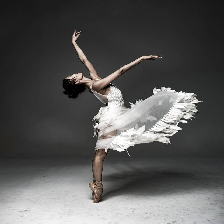

In [102]:
tf.keras.preprocessing.image.load_img(picture_path, target_size=(224,224))

In [103]:
print(f'''picture:{np.round(model.predict(picture),2)}''')

1/1 [==============================] - 0s 33ms/step
picture:[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02
  0.01 0.01]]


In [104]:
score=np.round(model.predict(picture),2)

1/1 [==============================] - 0s 31ms/step


In [105]:
score[0]

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01],
      dtype=float32)

In [106]:
a=0
for i in range(0,len(score[0])):
    if score[0][i]>a:
        a=score[0][i]       
print(a)

0.02


In [107]:
for i in range(0,len(score[0])):
    if score[0][i]==a:
        searching_label=classnamelist[i]
        print(classnamelist[i])

whistling


In [78]:
finallist=dictionary['whistling']

In [79]:
finallist

[[<moviepy.video.io.VideoFileClip.VideoFileClip at 0x22ce00cc690>,
  'whistling_603'],
  'whistling_1109'],
  'whistling_1118'],
  'whistling_1159'],
  'whistling_1714'],
  'whistling_1728'],
  'whistling_1739'],
  'whistling_1751'],
  'whistling_1757'],
  'whistling_1780'],
  'whistling_1790'],
  'whistling_1805'],
  'whistling_1824'],
  'whistling_1833'],
  'whistling_1845'],
  'whistling_1852'],
  'whistling_1861'],
  'whistling_1870'],
  'whistling_1877'],
  'whistling_1883'],
  'whistling_1903'],
  'whistling_1927'],
  'whistling_1946'],
  'whistling_1966'],
  'whistling_1973'],
  'whistling_1980'],
  'whistling_1997'],
  'whistling_2011'],
  'whistling_2035'],
  'whistling_2041'],
  'whistling_2051'],
  'whistling_2065'],
  'whistling_2082'],
  'whistling_2091'],
  'whistling_2108'],
  'whistling_2133'],
  'whistling_2143'],
  'whistling_2148'],
  'whistling_2170'],
  'whistling_2220'],
  'whistling_2228'],
  'whistling_2264'],
  'whistling_2274'],
  'whistling_2280'],
  'whistli

In [80]:
%cd C:\Users\zl\video-classification-3d-cnn-pytorch-master
file = open('../output.json')
segments = json.load(file)

C:\Users\zl\video-classification-3d-cnn-pytorch-master


In [81]:
fps=video.fps

In [82]:
folderPath = '../image_match_output/'
for i in finallist:
    i[0].write_videofile(folderPath + i[1] + '.mp4', audio_codec='aac')

Moviepy - Building video ../image_match_output/whistling_603.mp4.
MoviePy - Writing audio in whistling_603TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_603.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_603.mp4
Moviepy - Building video ../image_match_output/whistling_1109.mp4.
MoviePy - Writing audio in whistling_1109TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1109.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1109.mp4
Moviepy - Building video ../image_match_output/whistling_1118.mp4.
MoviePy - Writing audio in whistling_1118TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1118.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1118.mp4
Moviepy - Building video ../image_match_output/whistling_1159.mp4.
MoviePy - Writing audio in whistling_1159TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1159.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1159.mp4
Moviepy - Building video ../image_match_output/whistling_1714.mp4.
MoviePy - Writing audio in whistling_1714TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1714.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1714.mp4
Moviepy - Building video ../image_match_output/whistling_1728.mp4.
MoviePy - Writing audio in whistling_1728TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1728.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1728.mp4
Moviepy - Building video ../image_match_output/whistling_1739.mp4.
MoviePy - Writing audio in whistling_1739TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1739.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1739.mp4
Moviepy - Building video ../image_match_output/whistling_1751.mp4.
MoviePy - Writing audio in whistling_1751TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1751.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1751.mp4
Moviepy - Building video ../image_match_output/whistling_1757.mp4.
MoviePy - Writing audio in whistling_1757TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1757.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1757.mp4
Moviepy - Building video ../image_match_output/whistling_1780.mp4.
MoviePy - Writing audio in whistling_1780TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1780.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1780.mp4
Moviepy - Building video ../image_match_output/whistling_1790.mp4.
MoviePy - Writing audio in whistling_1790TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1790.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1790.mp4
Moviepy - Building video ../image_match_output/whistling_1805.mp4.
MoviePy - Writing audio in whistling_1805TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1805.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1805.mp4
Moviepy - Building video ../image_match_output/whistling_1824.mp4.
MoviePy - Writing audio in whistling_1824TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1824.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1824.mp4
Moviepy - Building video ../image_match_output/whistling_1833.mp4.
MoviePy - Writing audio in whistling_1833TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1833.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1833.mp4
Moviepy - Building video ../image_match_output/whistling_1845.mp4.
MoviePy - Writing audio in whistling_1845TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1845.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1845.mp4
Moviepy - Building video ../image_match_output/whistling_1852.mp4.
MoviePy - Writing audio in whistling_1852TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1852.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1852.mp4
Moviepy - Building video ../image_match_output/whistling_1861.mp4.
MoviePy - Writing audio in whistling_1861TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1861.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1861.mp4
Moviepy - Building video ../image_match_output/whistling_1870.mp4.
MoviePy - Writing audio in whistling_1870TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1870.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1870.mp4
Moviepy - Building video ../image_match_output/whistling_1877.mp4.
MoviePy - Writing audio in whistling_1877TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1877.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1877.mp4
Moviepy - Building video ../image_match_output/whistling_1883.mp4.
MoviePy - Writing audio in whistling_1883TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1883.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1883.mp4
Moviepy - Building video ../image_match_output/whistling_1903.mp4.
MoviePy - Writing audio in whistling_1903TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1903.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1903.mp4
Moviepy - Building video ../image_match_output/whistling_1927.mp4.
MoviePy - Writing audio in whistling_1927TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1927.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1927.mp4
Moviepy - Building video ../image_match_output/whistling_1946.mp4.
MoviePy - Writing audio in whistling_1946TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1946.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1946.mp4
Moviepy - Building video ../image_match_output/whistling_1966.mp4.
MoviePy - Writing audio in whistling_1966TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1966.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1966.mp4
Moviepy - Building video ../image_match_output/whistling_1973.mp4.
MoviePy - Writing audio in whistling_1973TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1973.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1973.mp4
Moviepy - Building video ../image_match_output/whistling_1980.mp4.
MoviePy - Writing audio in whistling_1980TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1980.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1980.mp4
Moviepy - Building video ../image_match_output/whistling_1997.mp4.
MoviePy - Writing audio in whistling_1997TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1997.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1997.mp4
Moviepy - Building video ../image_match_output/whistling_2011.mp4.
MoviePy - Writing audio in whistling_2011TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2011.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2011.mp4
Moviepy - Building video ../image_match_output/whistling_2035.mp4.
MoviePy - Writing audio in whistling_2035TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2035.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2035.mp4
Moviepy - Building video ../image_match_output/whistling_2041.mp4.
MoviePy - Writing audio in whistling_2041TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2041.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2041.mp4
Moviepy - Building video ../image_match_output/whistling_2051.mp4.
MoviePy - Writing audio in whistling_2051TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2051.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2051.mp4
Moviepy - Building video ../image_match_output/whistling_2065.mp4.
MoviePy - Writing audio in whistling_2065TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2065.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2065.mp4
Moviepy - Building video ../image_match_output/whistling_2082.mp4.
MoviePy - Writing audio in whistling_2082TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2082.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2082.mp4
Moviepy - Building video ../image_match_output/whistling_2091.mp4.
MoviePy - Writing audio in whistling_2091TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2091.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2091.mp4
Moviepy - Building video ../image_match_output/whistling_2108.mp4.
MoviePy - Writing audio in whistling_2108TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2108.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2108.mp4
Moviepy - Building video ../image_match_output/whistling_2133.mp4.
MoviePy - Writing audio in whistling_2133TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2133.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2133.mp4
Moviepy - Building video ../image_match_output/whistling_2143.mp4.
MoviePy - Writing audio in whistling_2143TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2143.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2143.mp4
Moviepy - Building video ../image_match_output/whistling_2148.mp4.
MoviePy - Writing audio in whistling_2148TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2148.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2148.mp4
Moviepy - Building video ../image_match_output/whistling_2170.mp4.
MoviePy - Writing audio in whistling_2170TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2170.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2170.mp4
Moviepy - Building video ../image_match_output/whistling_2220.mp4.
MoviePy - Writing audio in whistling_2220TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2220.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2220.mp4
Moviepy - Building video ../image_match_output/whistling_2228.mp4.
MoviePy - Writing audio in whistling_2228TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2228.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2228.mp4
Moviepy - Building video ../image_match_output/whistling_2264.mp4.
MoviePy - Writing audio in whistling_2264TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2264.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2264.mp4
Moviepy - Building video ../image_match_output/whistling_2274.mp4.
MoviePy - Writing audio in whistling_2274TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2274.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2274.mp4
Moviepy - Building video ../image_match_output/whistling_2280.mp4.
MoviePy - Writing audio in whistling_2280TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2280.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2280.mp4
Moviepy - Building video ../image_match_output/whistling_2286.mp4.
MoviePy - Writing audio in whistling_2286TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2286.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2286.mp4
Moviepy - Building video ../image_match_output/whistling_2296.mp4.
MoviePy - Writing audio in whistling_2296TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2296.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2296.mp4
Moviepy - Building video ../image_match_output/whistling_2307.mp4.
MoviePy - Writing audio in whistling_2307TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2307.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2307.mp4
Moviepy - Building video ../image_match_output/whistling_2333.mp4.
MoviePy - Writing audio in whistling_2333TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2333.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2333.mp4
Moviepy - Building video ../image_match_output/whistling_2346.mp4.
MoviePy - Writing audio in whistling_2346TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2346.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2346.mp4
Moviepy - Building video ../image_match_output/whistling_2364.mp4.
MoviePy - Writing audio in whistling_2364TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2364.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2364.mp4
Moviepy - Building video ../image_match_output/whistling_2376.mp4.
MoviePy - Writing audio in whistling_2376TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2376.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2376.mp4
Moviepy - Building video ../image_match_output/whistling_2407.mp4.
MoviePy - Writing audio in whistling_2407TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2407.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2407.mp4
Moviepy - Building video ../image_match_output/whistling_2423.mp4.
MoviePy - Writing audio in whistling_2423TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2423.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2423.mp4
Moviepy - Building video ../image_match_output/whistling_2430.mp4.
MoviePy - Writing audio in whistling_2430TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2430.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2430.mp4
Moviepy - Building video ../image_match_output/whistling_2437.mp4.
MoviePy - Writing audio in whistling_2437TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2437.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2437.mp4
Moviepy - Building video ../image_match_output/whistling_2443.mp4.
MoviePy - Writing audio in whistling_2443TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2443.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2443.mp4
Moviepy - Building video ../image_match_output/whistling_2468.mp4.
MoviePy - Writing audio in whistling_2468TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2468.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2468.mp4
Moviepy - Building video ../image_match_output/whistling_2473.mp4.
MoviePy - Writing audio in whistling_2473TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2473.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2473.mp4
Moviepy - Building video ../image_match_output/whistling_2483.mp4.
MoviePy - Writing audio in whistling_2483TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2483.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2483.mp4
Moviepy - Building video ../image_match_output/whistling_2492.mp4.
MoviePy - Writing audio in whistling_2492TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2492.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2492.mp4
Moviepy - Building video ../image_match_output/whistling_2500.mp4.
MoviePy - Writing audio in whistling_2500TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2500.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2500.mp4
Moviepy - Building video ../image_match_output/whistling_2509.mp4.
MoviePy - Writing audio in whistling_2509TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2509.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2509.mp4
Moviepy - Building video ../image_match_output/whistling_2518.mp4.
MoviePy - Writing audio in whistling_2518TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2518.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2518.mp4
Moviepy - Building video ../image_match_output/whistling_2530.mp4.
MoviePy - Writing audio in whistling_2530TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2530.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2530.mp4
Moviepy - Building video ../image_match_output/whistling_2536.mp4.
MoviePy - Writing audio in whistling_2536TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2536.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2536.mp4
Moviepy - Building video ../image_match_output/whistling_2549.mp4.
MoviePy - Writing audio in whistling_2549TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2549.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2549.mp4
Moviepy - Building video ../image_match_output/whistling_2557.mp4.
MoviePy - Writing audio in whistling_2557TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2557.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2557.mp4
Moviepy - Building video ../image_match_output/whistling_2567.mp4.
MoviePy - Writing audio in whistling_2567TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2567.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2567.mp4
Moviepy - Building video ../image_match_output/whistling_2603.mp4.
MoviePy - Writing audio in whistling_2603TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_2603.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_2603.mp4
Moviepy - Building video ../image_match_output/whistling_192.mp4.
MoviePy - Writing audio in whistling_192TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_192.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_192.mp4
Moviepy - Building video ../image_match_output/whistling_354.mp4.
MoviePy - Writing audio in whistling_354TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_354.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_354.mp4
Moviepy - Building video ../image_match_output/whistling_374.mp4.
MoviePy - Writing audio in whistling_374TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_374.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_374.mp4
Moviepy - Building video ../image_match_output/whistling_502.mp4.
MoviePy - Writing audio in whistling_502TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_502.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_502.mp4
Moviepy - Building video ../image_match_output/whistling_529.mp4.
MoviePy - Writing audio in whistling_529TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_529.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_529.mp4
Moviepy - Building video ../image_match_output/whistling_554.mp4.
MoviePy - Writing audio in whistling_554TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_554.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_554.mp4
Moviepy - Building video ../image_match_output/whistling_648.mp4.
MoviePy - Writing audio in whistling_648TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_648.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_648.mp4
Moviepy - Building video ../image_match_output/whistling_738.mp4.
MoviePy - Writing audio in whistling_738TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_738.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_738.mp4
Moviepy - Building video ../image_match_output/whistling_1346.mp4.
MoviePy - Writing audio in whistling_1346TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../image_match_output/whistling_1346.mp4



Moviepy - Done !
Moviepy - video ready ../image_match_output/whistling_1346.mp4
